# 원천 이미지에서 신호등 영역만 추출하여 시각화

## 하나의 이미지로 테스트 
파일명 : 14959040.jpg (paths 경로에 넣어두기)

In [1]:
import os
import matplotlib.pyplot as plt

# 신호등 후보 영역 검출 로직 임포트
# import sys
# sys.path.append("..") # 상위 디렉토리 접근 (같은 경로에 있다면 안해도됨)
from traffic_light_module import *

In [2]:
# 추출 전 데이터 위치 (테스트할 원천이미지가 있는 경로)
paths = "./trainingData/training/test/"

# 신호등 검출 후 저장할 위치 (g, y, r 나눠줄 필요없음)
val_path = './vali_data/'

In [3]:
light_list = os.listdir(paths)

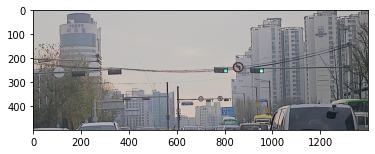

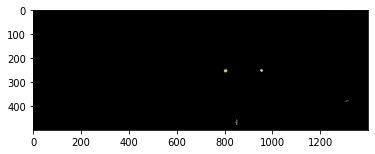

./trainingData/training/test/13681512.jpg///G1.jpg
./trainingData/training/test/13681512.jpg///G2.jpg


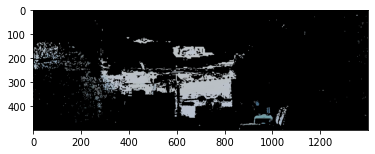

./trainingData/training/test/13681512.jpg///Y3.jpg
./trainingData/training/test/13681512.jpg///Y4.jpg
./trainingData/training/test/13681512.jpg///Y5.jpg
./trainingData/training/test/13681512.jpg///Y6.jpg
./trainingData/training/test/13681512.jpg///Y7.jpg
./trainingData/training/test/13681512.jpg///Y8.jpg
./trainingData/training/test/13681512.jpg///Y9.jpg
./trainingData/training/test/13681512.jpg///Y10.jpg
./trainingData/training/test/13681512.jpg///Y11.jpg
./trainingData/training/test/13681512.jpg///Y12.jpg
./trainingData/training/test/13681512.jpg///Y13.jpg
./trainingData/training/test/13681512.jpg///Y14.jpg
./trainingData/training/test/13681512.jpg///Y15.jpg
./trainingData/training/test/13681512.jpg///Y16.jpg
./trainingData/training/test/13681512.jpg///Y17.jpg
./trainingData/training/test/13681512.jpg///Y18.jpg
./trainingData/training/test/13681512.jpg///Y19.jpg
./trainingData/training/test/13681512.jpg///Y20.jpg
./trainingData/training/test/13681512.jpg///Y21.jpg
./trainingData/trai

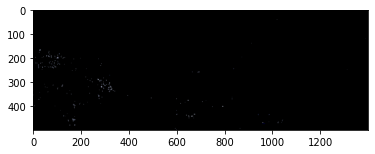

./trainingData/training/test/13681512.jpg///R52.jpg
./trainingData/training/test/13681512.jpg///R53.jpg


In [4]:
first_detect = []

for img in light_list:
    if img == ".DS_Store":
        continue
        
    show_img = cv2.imread(paths + img)
    show_img = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
    show_img = show_img[0:500, 300:1700]
    plt.imshow(show_img)
    plt.show()
    print("===========================================================")
        
    # ROI 지정, x,y,w,h ,N 설정 완료
    x1 = 300
    y1 = 0
    w1 = 1400
    h1 = 500
    
    green(paths, img, X = x1, Y = y1, W = w1, H = h1, first_detect = first_detect, path_g = val_path)
    yellow(paths, img, X = x1, Y = y1, W = w1, H = h1, first_detect = first_detect, path_y = val_path)
    red(paths, img, X = x1, Y = y1, W = w1, H = h1, first_detect = first_detect, path_r = val_path)

In [5]:
first_detect

[[[245, 260, 1214, 1265], '13681512_1'],
 [[243, 263, 1062, 1116], '13681512_2'],
 [[452, 470, 1270, 1314], '13681512_3'],
 [[434, 447, 880, 913], '13681512_4'],
 [[415, 430, 1313, 1352], '13681512_5'],
 [[415, 428, 559, 598], '13681512_6'],
 [[408, 438, 1318, 1390], '13681512_7'],
 [[380, 412, 539, 619], '13681512_8'],
 [[374, 404, 1204, 1276], '13681512_9'],
 [[359, 371, 622, 658], '13681512_10'],
 [[355, 381, 529, 606], '13681512_11'],
 [[353, 368, 584, 623], '13681512_12'],
 [[350, 365, 567, 606], '13681512_13'],
 [[347, 361, 521, 557], '13681512_14'],
 [[340, 367, 495, 564], '13681512_15'],
 [[338, 352, 685, 729], '13681512_16'],
 [[297, 365, 483, 651], '13681512_17'],
 [[303, 321, 492, 547], '13681512_18'],
 [[290, 308, 530, 577], '13681512_19'],
 [[290, 302, 857, 890], '13681512_20'],
 [[285, 309, 860, 918], '13681512_21'],
 [[283, 295, 563, 591], '13681512_22'],
 [[276, 302, 495, 583], '13681512_23'],
 [[256, 305, 456, 577], '13681512_24'],
 [[253, 274, 1026, 1087], '13681512_2

# 신경망 모델에 적용

In [6]:
import os
import cv2
import numpy as np
import random
from PIL import Image

from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

## 신호등 검출 및 색 분류 모델 불러오기

In [7]:
model = tf.keras.models.load_model('traffic_light_0307.h5')

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 28, 32)         896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 14, 32)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 14, 32)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 12, 64)         18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 1, 6, 64)         

## 검출된 신호등 이미지를  입력값으로 만들기

In [9]:
Path2 = './vali_data/'
file_list = os.listdir(Path2)

if ".DS_Store" in file_list:
    file_list.remove(".DS_Store")

data2 = []

for A in file_list:
    if A == ".DS_Store":
        continue
    try:
        img2 = cv2.imread(Path2+A)
        res2 = cv2.resize(img2, dsize=(30,10), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(Path2+A,res2)
    except Exception as e:
        print(str(e))
    
for A in file_list:
    if A == ".DS_Store":
        continue
    try:
        img3 = Image.open(Path2+A)
        data2.append(np.array(img3))
        img3.close()
    except Exception as e:
        print(str(e))

In [10]:
data2

[array([[[ 87,  94, 100],
         [ 79,  86,  92],
         [ 81,  85,  94],
         [ 65,  72,  80],
         [ 52,  59,  67],
         [ 39,  50,  56],
         [ 34,  47,  55],
         [ 34,  49,  56],
         [ 36,  49,  57],
         [ 35,  48,  56],
         [ 34,  43,  50],
         [ 96, 105, 112],
         [ 77,  88,  92],
         [ 79,  93,  96],
         [ 75,  91,  91],
         [ 64,  84,  82],
         [ 49,  76,  69],
         [ 41,  73,  62],
         [ 62,  95,  88],
         [ 54,  87,  80],
         [ 13,  40,  35],
         [ 10,  46,  36],
         [  0,  50,  34],
         [ 27,  90,  69],
         [  0,  50,  28],
         [  0,  33,  14],
         [  0,  38,  22],
         [ 43,  75,  62],
         [ 21,  48,  39],
         [ 82, 108,  99]],
 
        [[ 76,  83,  89],
         [ 63,  70,  76],
         [ 60,  64,  73],
         [ 69,  73,  82],
         [ 80,  87,  95],
         [ 68,  79,  85],
         [ 57,  70,  78],
         [ 53,  68,  75],
         

## 모델에 적용

In [11]:
data2 = np.asarray(data2) / 255.0
prediction = model.predict(data2)

In [12]:
prediction

array([[1.00000000e+00, 6.57739696e-10, 7.39388595e-09],
       [1.48323596e-01, 5.49039394e-02, 7.96772420e-01],
       [2.20120817e-01, 7.45337084e-02, 7.05345511e-01],
       [4.30228710e-01, 3.09394330e-01, 2.60376960e-01],
       [9.24857985e-03, 9.58141327e-01, 3.26101296e-02],
       [2.84600466e-01, 3.06659460e-01, 4.08740044e-01],
       [1.90369889e-01, 2.27332652e-01, 5.82297444e-01],
       [8.11263453e-03, 5.23277819e-01, 4.68609542e-01],
       [9.98623252e-01, 1.34224465e-04, 1.24244753e-03],
       [5.36901653e-01, 9.81524885e-02, 3.64945918e-01],
       [6.63147509e-01, 1.47807851e-01, 1.89044610e-01],
       [1.00000000e+00, 1.56486402e-09, 1.25992488e-08],
       [3.06276947e-01, 5.23429930e-01, 1.70293227e-01],
       [1.51661053e-01, 7.72693276e-01, 7.56456330e-02],
       [1.43714249e-01, 1.96653511e-02, 8.36620390e-01],
       [8.63111734e-01, 4.21196185e-02, 9.47686508e-02],
       [9.09591854e-01, 1.52828144e-02, 7.51253590e-02],
       [9.40505981e-01, 1.61305

## 결과 값

In [13]:
len(first_detect)

53

In [14]:
light_order = {0:"green",1:"red",2:"yellow",3:"unknown"}

# 신호등 파일명과 색을 한 리스트에 담기 
detect_img = [] 

for i, x in enumerate(prediction):
    count = 0
    for y in x:
        if y > 0.999:
            count += 1

    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])
        detect_img.append([file_list[i],light_order[np.argmax(x)]])
    else:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[3])

0번째 신호등: 13681512_1.jpg : green
1번째 신호등: 13681512_10.jpg : unknown
2번째 신호등: 13681512_11.jpg : unknown
3번째 신호등: 13681512_12.jpg : unknown
4번째 신호등: 13681512_13.jpg : unknown
5번째 신호등: 13681512_14.jpg : unknown
6번째 신호등: 13681512_15.jpg : unknown
7번째 신호등: 13681512_16.jpg : unknown
8번째 신호등: 13681512_17.jpg : unknown
9번째 신호등: 13681512_18.jpg : unknown
10번째 신호등: 13681512_19.jpg : unknown
11번째 신호등: 13681512_2.jpg : green
12번째 신호등: 13681512_20.jpg : unknown
13번째 신호등: 13681512_21.jpg : unknown
14번째 신호등: 13681512_22.jpg : unknown
15번째 신호등: 13681512_23.jpg : unknown
16번째 신호등: 13681512_24.jpg : unknown
17번째 신호등: 13681512_25.jpg : unknown
18번째 신호등: 13681512_26.jpg : unknown
19번째 신호등: 13681512_27.jpg : unknown
20번째 신호등: 13681512_28.jpg : unknown
21번째 신호등: 13681512_29.jpg : unknown
22번째 신호등: 13681512_3.jpg : unknown
23번째 신호등: 13681512_30.jpg : unknown
24번째 신호등: 13681512_31.jpg : unknown
25번째 신호등: 13681512_32.jpg : unknown
26번째 신호등: 13681512_33.jpg : unknown
27번째 신호등: 13681512_34.jpg : unknown
28번째 신호등:

In [15]:
detect_img

[['13681512_1.jpg', 'green'], ['13681512_2.jpg', 'green']]

In [16]:
print(len(file_list),len(first_detect))

53 53


In [17]:
first_detect

[[[245, 260, 1214, 1265], '13681512_1'],
 [[243, 263, 1062, 1116], '13681512_2'],
 [[452, 470, 1270, 1314], '13681512_3'],
 [[434, 447, 880, 913], '13681512_4'],
 [[415, 430, 1313, 1352], '13681512_5'],
 [[415, 428, 559, 598], '13681512_6'],
 [[408, 438, 1318, 1390], '13681512_7'],
 [[380, 412, 539, 619], '13681512_8'],
 [[374, 404, 1204, 1276], '13681512_9'],
 [[359, 371, 622, 658], '13681512_10'],
 [[355, 381, 529, 606], '13681512_11'],
 [[353, 368, 584, 623], '13681512_12'],
 [[350, 365, 567, 606], '13681512_13'],
 [[347, 361, 521, 557], '13681512_14'],
 [[340, 367, 495, 564], '13681512_15'],
 [[338, 352, 685, 729], '13681512_16'],
 [[297, 365, 483, 651], '13681512_17'],
 [[303, 321, 492, 547], '13681512_18'],
 [[290, 308, 530, 577], '13681512_19'],
 [[290, 302, 857, 890], '13681512_20'],
 [[285, 309, 860, 918], '13681512_21'],
 [[283, 295, 563, 591], '13681512_22'],
 [[276, 302, 495, 583], '13681512_23'],
 [[256, 305, 456, 577], '13681512_24'],
 [[253, 274, 1026, 1087], '13681512_2

In [18]:
# vali 이미지 검출시 추출된 좌표랑 모델에서 예측된 파일

In [19]:
xy = [] # 파일명, 좌표, 색깔 담기

for i in range(0, len(detect_img)):
    for j in range(0, len(first_detect)):
        if first_detect[j][1] == detect_img[i][0].split(".")[0]:
            xy.append([first_detect[j][1], first_detect[j][0], detect_img[i][1]])
            
    #print(detect_img[i][0].split(".")[0])
xy

[['13681512_1', [245, 260, 1214, 1265], 'green'],
 ['13681512_2', [243, 263, 1062, 1116], 'green']]

In [20]:
array = []

for i in range(0, len(xy)):
    coor = xy[i][1] # 좌표
    color = xy[i][2] # 색깔
    
    for j in range(i+1, len(xy)):
        if xy[i][0] == xy[j][0]:
            coor = xy[j][1]
            color = xy[j][2]
            
    if [xy[i][0], coor, color] not in array:
        array.append([xy[i][0], coor, color])
        
    #print(xy[i])
array

[['13681512_1', [245, 260, 1214, 1265], 'green'],
 ['13681512_2', [243, 263, 1062, 1116], 'green']]

In [21]:
# 시각화를 위해 새로 추가한 부분

In [22]:
import cv2
import matplotlib.pyplot as plt

from matplotlib.image import imread
import matplotlib.image as image

In [23]:
filename = detect_img[0][0].split('_')[0]

In [24]:
print(paths + filename + '.jpg')

./trainingData/training/test/13681512.jpg


13681512_1 [245, 260, 1214, 1265] green
13681512_2 [243, 263, 1062, 1116] green


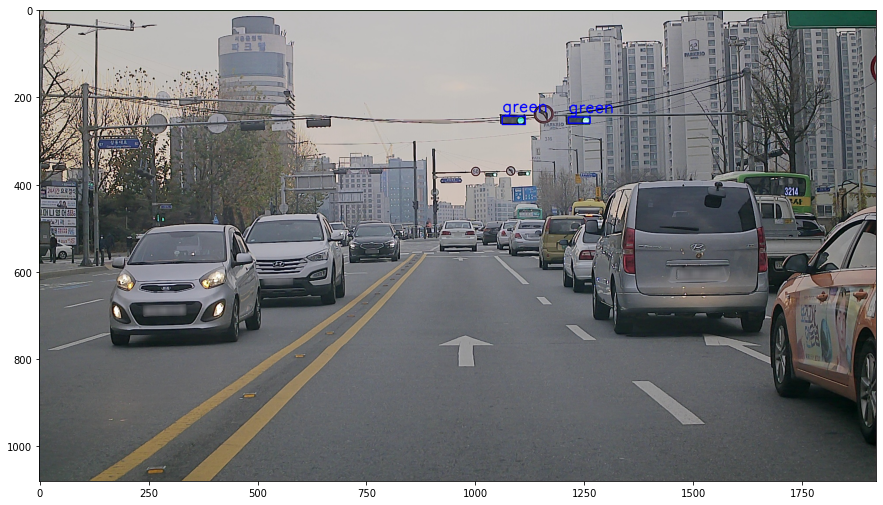

"\ncv2.imshow('image',img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\ncv2.waitKey(1)\n"

In [25]:
img = cv2.imread(paths + filename + '.jpg') 
font = cv2.FONT_HERSHEY_SIMPLEX 

for a,b,c in array:
    print(a,b,c)
    y,h,x,w = b
    w = w - x
    h = h - y
    text = c
    org = (x, y - 10) # 텍스트 위치
    
    cv2.rectangle(img,(x, y, w, h), 255, 2)
    cv2.putText(img, text, org, font, 1.2, (255, 0, 0), 2)


plt.figure(figsize = (15, 12))
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)
plt.show()


"""
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
"""

------------------------------------------